# <center style="color:red"> **Linear Discriminant Analysis** </center>  

<h4 style="text-align:right">By Trần Minh Dương</h4>  

# Overview  

Linear discriminant analysis (LDA) is a statistical method for reducing redundant and noisy information from an original sample to its essential features.

# Steps

Let's break down LDA step by step by dealing with an example

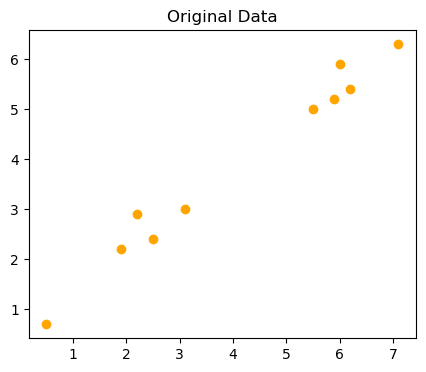

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Sample dataset (2 features, 2 classes)
data = np.array([
    [2.5, 2.4, 0], [0.5, 0.7, 0], [2.2, 2.9, 0], [1.9, 2.2, 0], [3.1, 3.0, 0],
    [7.1, 6.3, 1], [5.9, 5.2, 1], [6.2, 5.4, 1], [6.0, 5.9, 1], [5.5, 5.0, 1]
])

plt.figure(figsize=(5,4))
plt.scatter(data[:,0],data[:,1],color='orange')
plt.title("Original Data")
plt.show()

## Objective:
We want to find a unit vector v  such that:

$$
\max_{\mathbf{v} : \|\mathbf{v}\| = 1} \frac{(\mu_1 - \mu_2)^2}{s_1^2 + s_2^2}.
$$

Where:
+ $\mu_j = v^T  m_j $ : mean of each class projected on vector $v$
+ $s_j^2 = \sum_{i} (v^T  x_i - \mu_j)$ : variances of the projected classes

The optimal $\mathbf{v}$ should be such that

+   $(\mu_1 - \mu_2)^2: \text{large}$
+   $s_1^2, s_2^2: \text{both small}$

## Step 0: Separate classes
Since LDA is a supervised method, we can divide the dataset into their corresponding groups thanks to their labels.

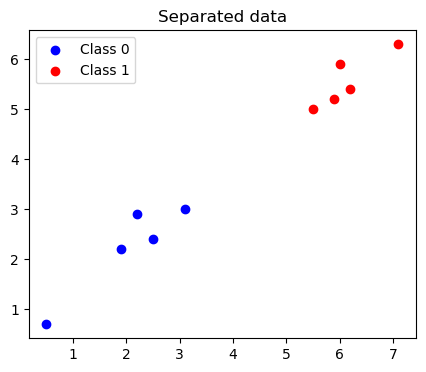

In [16]:
# Step 0: Separate classes
X_0 = data[data[:, -1] == 0][:, :-1]  # Class 0
X_1 = data[data[:, -1] == 1][:, :-1]  # Class 1
# data[:, -1] == 0 is the mask that selects only those with label 0
# [:,:-1] removes the last column (label), preserving features only

plt.figure(figsize=(5, 4))

# Plot original data in 2D
plt.scatter(X_0[:, 0], X_0[:, 1], color='blue', label='Class 0')
plt.scatter(X_1[:, 0], X_1[:, 1], color='red', label='Class 1')
plt.legend()
plt.title("Separated data")
plt.show()

## Step 1: Compute the mean
Calculate the mean vectors for each class

Mean vector for Class 0: 2.04 2.2399999999999998
Mean vector for Class 1: 6.14 5.56


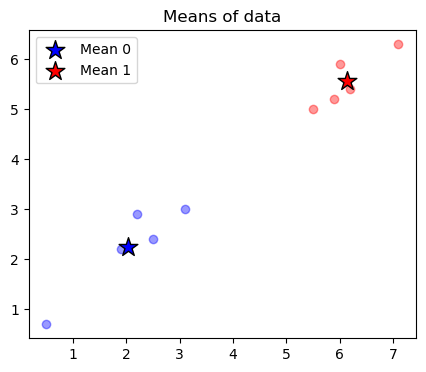

In [55]:
# Step 1: Compute mean vectors
mu_0 = np.mean(X_0, axis=0)
mu_1 = np.mean(X_1, axis=0)

print("Mean vector for Class 0:", mu_0[0], mu_0[1])
print("Mean vector for Class 1:", mu_1[0], mu_1[1])

plt.figure(figsize=(5, 4))

# Plot the data points
plt.scatter(X_0[:, 0], X_0[:, 1], alpha=0.4, color='blue')
plt.scatter(X_1[:, 0], X_1[:, 1], alpha=0.4, color='red')

# Plot the means
plt.scatter(mu_0[0], mu_0[1], color='blue', marker="*", s=200, edgecolors='black', label='Mean 0')
plt.scatter(mu_1[0], mu_1[1], color='red', marker="*", s=200, edgecolors='black', label='Mean 1')

plt.legend()
plt.title("Means of data")
plt.show()


In [18]:
# Step 2: Compute within-class scatter matrix Sw
S_w = np.zeros((2, 2))
for X, mu in zip([X_0, X_1], [mu_0, mu_1]):
    diff = X - mu.T
    S_w += diff.T @ diff  # Compute scatter matrix

print(S_w)

[[5.164 4.46 ]
 [4.46  4.544]]


In [19]:
# Step 3: Compute between-class scatter matrix Sb
mean_diff = (mu_0 - mu_1)
S_b = mean_diff @ mean_diff.T

print(S_b)

[[16.81   13.612 ]
 [13.612  11.0224]]


In [20]:
# Step 4: Solve the generalized eigenvalue problem Sw^-1 Sb
eigvals, eigvecs = np.linalg.eig(np.linalg.inv(S_w) @ S_b)
print(eigvals)
print(eigvecs)

[3.32583960e+00 2.71151738e-15]
[[ 0.95820072 -0.62930728]
 [-0.2860968   0.77715658]]


In [21]:
# Step 5: Select the eigenvector corresponding to the largest eigenvalue
lda_vector = eigvecs[:, np.argmax(eigvals)]
print(lda_vector)

[ 0.95820072 -0.2860968 ]


In [22]:
# Step 6: Project data onto LDA axis
X_projected = data[:, :-1] @ lda_vector
print(X_projected)

[1.70886948 0.2788326  1.27836086 1.19116841 2.11213183 5.00081527
 4.16568089 4.39592175 4.0612332  3.83961996]


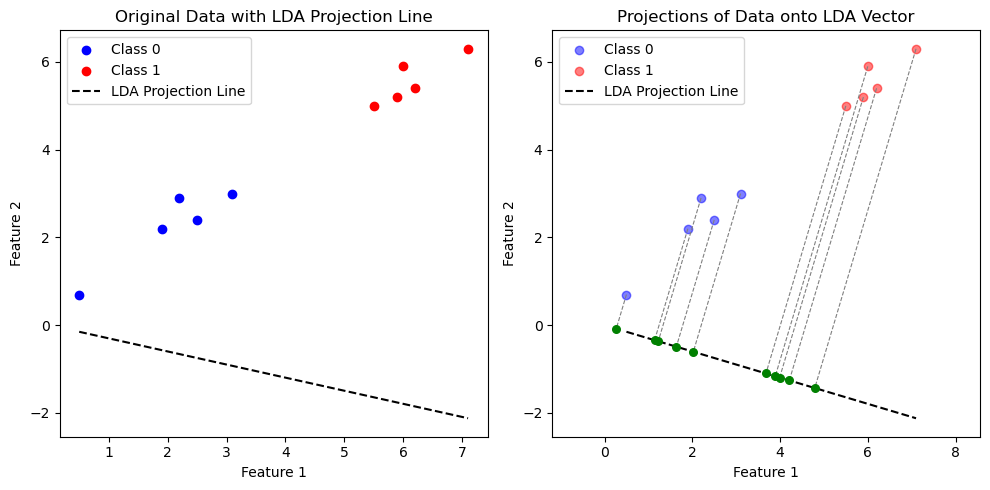

In [36]:
# Step 7: Visualization

plt.figure(figsize=(10, 5))
# Plot original data in 2D
plt.subplot(1, 2, 1)
plt.scatter(X_0[:, 0], X_0[:, 1], color='blue', label='Class 0')
plt.scatter(X_1[:, 0], X_1[:, 1], color='red', label='Class 1')

# Plot LDA projection line
line_x = np.linspace(min(data[:, 0]), max(data[:, 0]), 10)
line_y = (lda_vector[1] / lda_vector[0]) * line_x  # Line equation from LDA direction
plt.plot(line_x, line_y, 'k--', label='LDA Projection Line')

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Original Data with LDA Projection Line")
plt.legend()

# Plot projections of data onto LDA vector in 2D space
plt.subplot(1, 2, 2)
plt.scatter(X_0[:, 0], X_0[:, 1], color='blue', alpha=0.5, label='Class 0')
plt.scatter(X_1[:, 0], X_1[:, 1], color='red', alpha=0.5, label='Class 1')

# Plot LDA projection line
line_x = np.linspace(min(data[:, 0]), max(data[:, 0]), 10)
line_y = (lda_vector[1] / lda_vector[0]) * line_x  # Line equation from LDA direction
plt.plot(line_x, line_y, 'k--', label='LDA Projection Line')

# Compute projections onto LDA vector
projections = np.dot(data[:, :-1], lda_vector[:, np.newaxis]) * lda_vector

# Plot projected points and lines connecting them to original points
for i in range(data.shape[0]):
    plt.plot([data[i, 0], projections[i, 0]], [data[i, 1], projections[i, 1]], 'gray', linestyle='--', linewidth=0.8)
    plt.scatter(projections[i, 0], projections[i, 1], color='green', s=30, zorder=3)

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Projections of Data onto LDA Vector")
plt.legend()
plt.axis('equal')

plt.tight_layout()
plt.show()